In [12]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns



In [23]:
df= pd.read_excel('data_dash.xlsx')

In [20]:
df.head(5)

,Country,Product,Units Sold,Revenue,Cost,Profit,Date
0,India,Chocolate Chip,1725,"$8,625.00","$3,450.00","$5,175.00",11/1/2019
1,India,Chocolate Chip,2152,"$10,760.00","$4,304.00","$6,456.00",12/1/2019
2,India,Chocolate Chip,2349,"$11,745.00","$4,698.00","$7,047.00",9/1/2019
3,India,Chocolate Chip,1228,"$6,140.00","$2,456.00","$3,684.00",10/1/2019
4,India,Chocolate Chip,1389,"$6,945.00","$2,778.00","$4,167.00",10/1/2019


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Country     1225 non-null   object        
 1   Product     1225 non-null   object        
 2   Units Sold  1225 non-null   float64       
 3   Revenue     1225 non-null   float64       
 4   Cost        1225 non-null   float64       
 5   Profit      1225 non-null   float64       
 6   Date        1225 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 67.1+ KB


In [25]:
df.describe()

,Units Sold,Revenue,Cost,Profit
count,1225.000000,1225.000000,1225.000000,1225.000000
mean,1622.019592,6757.133878,2775.848367,3981.285510
std,873.003844,4660.467982,2052.363875,2637.221232
min,200.000000,200.000000,40.000000,160.000000
25%,914.000000,2895.000000,1180.000000,1857.500000
50%,1540.000000,5885.000000,2431.250000,3429.000000
75%,2276.000000,9576.000000,3968.000000,5469.000000
max,4493.000000,23988.000000,10994.500000,13479.000000


In [28]:
df.isnull().sum()

Country       0
Product       0
Units Sold    0
Revenue       0
Cost          0
Profit        0
Date          0
dtype: int64

In [29]:
print(df.shape)

(1225, 7)


In [33]:
df['Product'].value_counts()

Chocolate Chip                   353
White Chocolate Macadamia Nut    191
Sugar                            190
Oatmeal Raisin                   165
Fortune Cookie                   163
Snickerdoodle                    163
Name: Product, dtype: int64

<AxesSubplot:title={'center':'Revenue by country'}, xlabel='Revenue', ylabel='Country'>

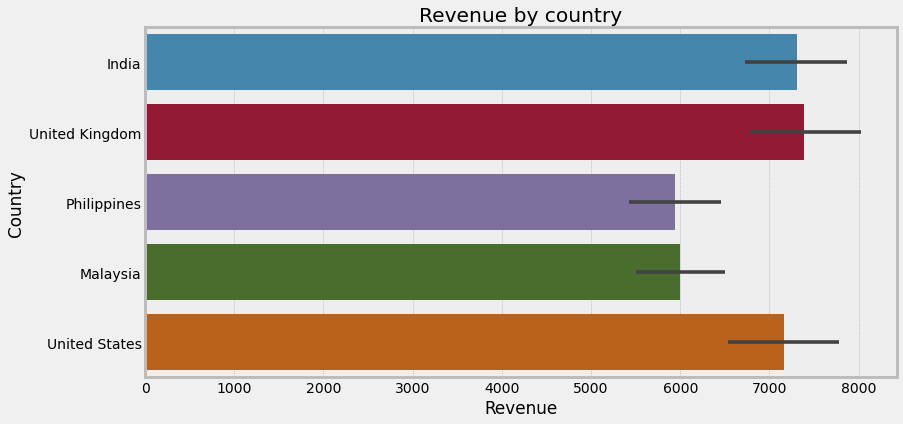

In [79]:


plt.figure(figsize = (12,6))
plt.title('Revenue by country')
sns.barplot(x ='Revenue', y='Country', data=df )

In [39]:
#What is the over all sales trend
df['Date'].min()


Timestamp('2019-09-01 00:00:00')

In [40]:
df['Date'].max()

Timestamp('2020-12-01 00:00:00')

In [43]:
df['Date'].median()

Timestamp('2020-06-01 00:00:00')

In [44]:
#getting month year from dataset
df['month_year'] = df ['Date'].apply(lambda x: x.strftime('%y-%m'))

In [45]:
df.groupby('month_year').sum()

,Units Sold,Revenue,Cost,Profit
month_year,,,,
19-09,50601.0,212076.0,87263.45,124812.55
19-10,95622.0,386395.0,158119.40,228275.60
19-11,65481.0,272112.0,111883.75,160228.25
19-12,52970.0,232566.0,96228.25,136337.75
20-01,135682.0,583706.0,241070.80,342635.20
20-02,110230.0,463850.0,191913.50,271936.50
20-03,106840.0,438142.0,179175.90,258966.10
20-04,157786.0,666760.0,273228.10,393531.90
20-05,103542.0,431732.0,178018.30,253713.70


In [46]:
df_trend = df.groupby('month_year').sum() ['Profit'].reset_index()

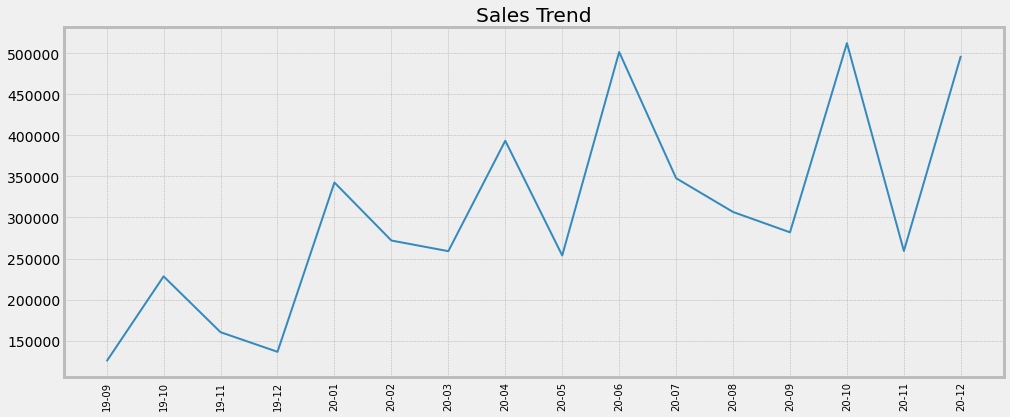

In [78]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['Profit'])
plt.xticks(rotation='vertical', size=10)
plt.title('Sales Trend')
plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_12712/2247487536.py, line 1)

In [59]:
df['Product'].value_counts()

Chocolate Chip                   353
White Chocolate Macadamia Nut    191
Sugar                            190
Oatmeal Raisin                   165
Fortune Cookie                   163
Snickerdoodle                    163
Name: Product, dtype: int64

In [60]:

#inseted into a dataframe and inserted into a veriabelr for plotting
product_df =pd.DataFrame(df['Product'].value_counts())
product_df

,Product
Chocolate Chip,353
White Chocolate Macadamia Nut,191
Sugar,190
Oatmeal Raisin,165
Fortune Cookie,163
Snickerdoodle,163


In [61]:
df['Product'].value_counts()

Chocolate Chip                   353
White Chocolate Macadamia Nut    191
Sugar                            190
Oatmeal Raisin                   165
Fortune Cookie                   163
Snickerdoodle                    163
Name: Product, dtype: int64

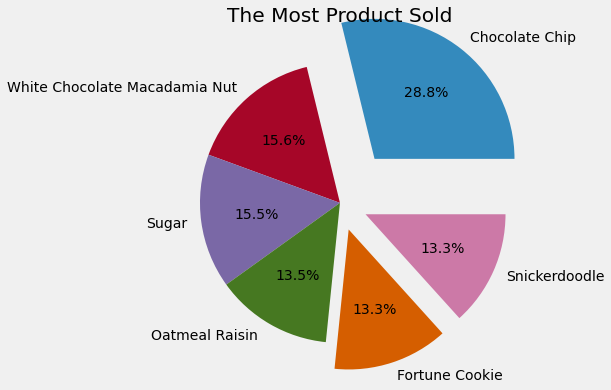

In [73]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
slices=[353,191,190,165,163,163]
explode= [0.4,0,0,0,0.2,0.2]
labels=['Chocolate Chip ','White Chocolate Macadamia Nut','Sugar','Oatmeal Raisin ','Fortune Cookie', 'Snickerdoodle']
plt.pie(slices, labels=labels,explode=explode,autopct='%1.1f%%')
plt.title('The Most Product Sold')

plt.show()



In [81]:
from Jupyter_dash import JupyterDash

import dash_core_components as doc

import dash_html_components as html

import plotyly.express as px

from jupyter_dash import JupyterDash

from dash.dependencies import Input, Output

ModuleNotFoundError: No module named 'Jupyter_dash'

In [82]:
!pip install voila

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.



  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.1.0
    Uninstalling nbconvert-6.1.0:
      Successfully uninstalled nbconvert-6.1.0
